# Creating a Network Diagram from a Dataset

Import libraries and the init the dataset fron github

In [35]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv("https://github.com/theamitabh/graphnetwork/raw/main/datasets/dataset.csv")  #load the data set
df.head(20)


,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0
5,-2145886989,1,"""2019-12-12 11:02:49""",chapter-9,hillard,1971,377,1085,0
6,-2145886989,1,"""2019-12-12 14:50:07""",chapter-2,vos,726,219,1121,0
7,-2145886989,1,"""2019-12-10 19:37:20""",chapter-1,mcnamara,2533,461,880,1
8,-2145886989,5,"""2019-12-10 19:37:50""",chapter-1,mcnamara,2533,461,880,1
9,-2145886989,1,"""2019-12-11 12:19:01""",chapter-1,mcnamara,2533,461,880,1



*   Sort the dataframe by userid, and then by time to sequence by individual user and their reading habits
*   Create Source column with chapter+bookname
*   Create Target column by shifting sourcecolumn one row up
*   Create user_check flag column by shifting userid one row up to easily identify userid change later



In [36]:
df=df.sort_values(by=['user_id','date_created'])
df["source"] = df["chapter"] + df["book"] #source is the book+chapter user is currently reading
df["target"]= df["source"].shift(-1)   # target is the book+chapter user will read next, by shifting source column up by a row
df["user_check"]= df["user_id"].shift(-1) # user_check column by shifting up a row to identify is user_id changes in next row

df.head(10)


,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source,target,user_check
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1,chapter-8bhargava,chapter-8fain3,-2.146355e+09
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1,chapter-8fain3,chapter-1ramamurthy,-2.146355e+09
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1,chapter-1ramamurthy,chapter-1thomas,-2.146355e+09
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1,chapter-1thomas,about-this-bookprasanna,-2.146169e+09
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0,about-this-bookprasanna,chapter-4mcnamara,-2.145887e+09
29,-2145886989,10,"""2019-12-10 13:07:05""",chapter-4,mcnamara,2533,461,880,1,chapter-4mcnamara,chapter-4mcnamara,-2.145887e+09
32,-2145886989,10,"""2019-12-10 13:41:25""",chapter-4,mcnamara,2533,461,880,1,chapter-4mcnamara,chapter-1mcnamara,-2.145887e+09
7,-2145886989,1,"""2019-12-10 19:37:20""",chapter-1,mcnamara,2533,461,880,1,chapter-1mcnamara,chapter-1mcnamara,-2.145887e+09
8,-2145886989,5,"""2019-12-10 19:37:50""",chapter-1,mcnamara,2533,461,880,1,chapter-1mcnamara,chapter-1mcnamara,-2.145887e+09
11,-2145886989,12,"""2019-12-11 12:18:30""",chapter-1,mcnamara,2533,461,880,1,chapter-1mcnamara,chapter-1mcnamara,-2.145887e+09


Identify whether to keep or drop the row.  Returns the user_id if next_row_user (in user_check) is the same is current user_id. If not NaN 

In [42]:
df['keep_drop'] = np.where((df['user_check'] == df['user_id']) , df['user_id'], np.nan)

df=df.dropna(subset=["keep_drop"])  # build edge list my removing rows having keep_drop as null values

df


,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source,target,user_check,keep_drop
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1,chapter-8fain3,chapter-1ramamurthy,-2.146355e+09,-2.146355e+09
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1,chapter-1ramamurthy,chapter-1thomas,-2.146355e+09,-2.146355e+09
29,-2145886989,10,"""2019-12-10 13:07:05""",chapter-4,mcnamara,2533,461,880,1,chapter-4mcnamara,chapter-4mcnamara,-2.145887e+09,-2.145887e+09
32,-2145886989,10,"""2019-12-10 13:41:25""",chapter-4,mcnamara,2533,461,880,1,chapter-4mcnamara,chapter-1mcnamara,-2.145887e+09,-2.145887e+09
7,-2145886989,1,"""2019-12-10 19:37:20""",chapter-1,mcnamara,2533,461,880,1,chapter-1mcnamara,chapter-1mcnamara,-2.145887e+09,-2.145887e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,-2019295583,6,"""2019-12-07 16:00:11""",chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2.019296e+09,-2.019296e+09
4990,-2019295583,10,"""2019-12-07 16:09:21""",chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2.019296e+09,-2.019296e+09
4991,-2019295583,102,"""2019-12-07 16:14:21""",chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2.019296e+09,-2.019296e+09
4992,-2019295583,107,"""2019-12-07 17:51:22""",chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2.019296e+09,-2.019296e+09


Creating a network using [NetworkX Pandas Edge List function ](https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html#)   and subsequent rendering

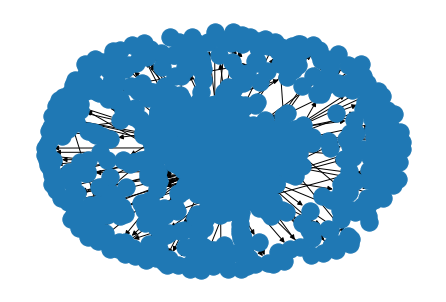

In [43]:
G=nx.from_pandas_edgelist(df,"source","target", create_using=nx.DiGraph)

nx.draw(G)